In [402]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [403]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [404]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.autograd import Variable

In [405]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [406]:
eval_size = 0.2
num_workers = 0
batch_size = 20

In [407]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

train_data = datasets.CIFAR10(root= "data", download = True, train = True, transform = transform)
test_data = datasets.CIFAR10(root= "data", download = True, train = False, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [408]:
num_train = len(train_data)
print("Total number of images available in CIFAR10 datasets: {}".format(num_train))

Total number of images available in CIFAR10 datasets: 50000


In [409]:
indices = list(range(num_train))
indices[:5]

[0, 1, 2, 3, 4]

In [410]:
np.random.shuffle(indices)
indices[:5]

[26530, 40151, 25464, 7398, 3456]

In [411]:
split = int(np.floor(num_train * eval_size))
train_idx, eval_idx = indices[:split], indices[split:]
train_idx[:5]
eval_idx[:5]

[26530, 40151, 25464, 7398, 3456]

[22399, 40686, 21206, 30596, 5178]

In [412]:
from torch.utils.data.sampler import SubsetRandomSampler

In [413]:
train_sampler = SubsetRandomSampler(train_idx)
eval_sampler = SubsetRandomSampler(eval_idx)

In [414]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,
                                           sampler = train_sampler, num_workers = num_workers)
eval_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,
                                          sampler = eval_sampler, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,
                                          shuffle = False, num_workers = num_workers)

In [415]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [416]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [417]:
type(images)
len(images)

torch.Tensor

20

In [418]:
classes[labels[0].item()]
images[0]

'automobile'

tensor([[[ 0.2314,  0.2471,  0.4588,  ...,  0.6078,  0.3255,  0.0196],
         [ 0.1451,  0.4275,  0.7569,  ...,  0.5608,  0.3255, -0.0039],
         [ 0.3255,  0.7098,  0.8980,  ...,  0.2392,  0.1373,  0.1216],
         ...,
         [ 0.0353, -0.0196, -0.0745,  ...,  0.1922,  0.1765,  0.1608],
         [ 0.0745,  0.0510,  0.0667,  ...,  0.1843,  0.1843,  0.1529],
         [ 0.1608,  0.1686,  0.1765,  ...,  0.1922,  0.1843,  0.1765]],

        [[ 0.2157,  0.2078,  0.4275,  ...,  0.6000,  0.3255,  0.0275],
         [ 0.1294,  0.3961,  0.7490,  ...,  0.5529,  0.3255, -0.0196],
         [ 0.2706,  0.6863,  0.8902,  ...,  0.2549,  0.1686,  0.1059],
         ...,
         [-0.0824, -0.1373, -0.2157,  ..., -0.0431, -0.0275, -0.0353],
         [-0.0510, -0.0824, -0.1059,  ..., -0.0275,  0.0118, -0.0118],
         [-0.0039,  0.0039, -0.0118,  ...,  0.0039,  0.0275,  0.0196]],

        [[ 0.1294,  0.1686,  0.4118,  ...,  0.5529,  0.1922, -0.2235],
         [-0.0039,  0.3490,  0.7569,  ...,  0

In [419]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [420]:
InteractiveShell.ast_node_interactivity = 'none'

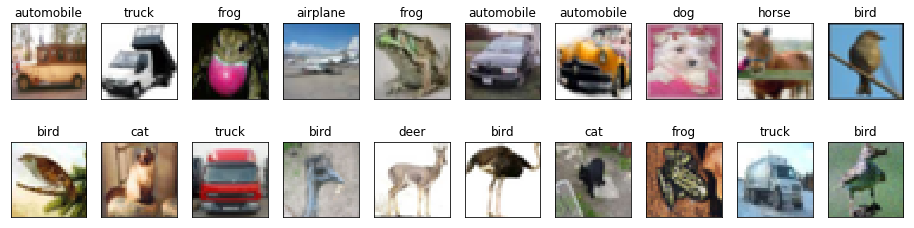

In [421]:
plt.figure(figsize = (16, 4))
for idx in range(len(images)):
    ax = plt.subplot(2, 10, idx+1, xticks = [], yticks = [])
    imshow(images[idx])
    ax.set_title(classes[labels[idx].item()])

In [422]:
InteractiveShell.ast_node_interactivity = 'all'

In [423]:
display_image = np.squeeze(images[4])
display_image.shape
display_image

torch.Size([3, 32, 32])

tensor([[[ 0.0745,  0.0588,  0.1137,  ..., -0.2706, -0.2392, -0.1608],
         [ 0.1216,  0.1294,  0.1686,  ..., -0.1529, -0.1765, -0.1608],
         [ 0.0745,  0.0902,  0.1451,  ...,  0.1294,  0.0745,  0.0353],
         ...,
         [ 0.2941,  0.2314,  0.2392,  ...,  0.4431,  0.4275,  0.4275],
         [ 0.2392,  0.2314,  0.2392,  ...,  0.4824,  0.4980,  0.4588],
         [ 0.2235,  0.2392,  0.2549,  ...,  0.4745,  0.4745,  0.4431]],

        [[ 0.0588,  0.0510,  0.1137,  ..., -0.3412, -0.3098, -0.2314],
         [ 0.1137,  0.1216,  0.1686,  ..., -0.2000, -0.2235, -0.2000],
         [ 0.0824,  0.0980,  0.1529,  ...,  0.1137,  0.0588,  0.0196],
         ...,
         [ 0.2863,  0.2235,  0.2314,  ...,  0.4118,  0.3961,  0.4039],
         [ 0.2314,  0.2235,  0.2314,  ...,  0.4510,  0.4667,  0.4275],
         [ 0.2157,  0.2314,  0.2471,  ...,  0.4431,  0.4431,  0.4118]],

        [[ 0.0588,  0.0118, -0.0039,  ..., -0.5059, -0.4902, -0.4275],
         [ 0.0824,  0.0902,  0.0824,  ..., -0

In [424]:
InteractiveShell.ast_node_interactivity = 'none'

In [425]:
display_image = torch.Tensor.numpy(display_image)

In [426]:
InteractiveShell.ast_node_interactivity = 'all'

In [427]:
display_image.shape
type(display_image)

(3, 32, 32)

numpy.ndarray

In [428]:
InteractiveShell.ast_node_interactivity = 'none'

In [429]:
channels = ["Red Channel", "Green Channel", "Blue Channel"]

In [430]:
display_image_fig = plt.figure(figsize = (32, 32))

<Figure size 2304x2304 with 0 Axes>

In [431]:
for id_image in range(display_image.shape[0]):
    display_image_ax = display_image_fig.add_subplot(1, 3, id_image + 1)
    img = display_image[id_image]
    
    thresh = img.max()/2.5
    
    display_image_ax.imshow(img, cmap = 'gray')
    display_image_ax.set_title(channels[id_image])
    
    width, height = img.shape
    for idx in range(width):
        for idy in range(height):
            val = round(img[idx][idy], 2) if img[idx][idy] != 0 else 0
            display_image_ax.annotate(str(val), xy = (idx, idy),
                                      color = 'white' if val < thresh else 'black'
                         
                                     )

In [ ]:
class Cifar10CNN(nn.Module):
    
    def __init__(self):
        super(Cifar10CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3,
                              stride = 1, padding = 1, bias = True)
        
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5,
                              stride = 1, padding = 2, bias = True)

        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5,
                              stride = 1, padding = 2, bias = True)
        
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.hidden1 = nn.Linear(in_features = 64 * 4 * 4, out_features = 512, bias = True)

        self.hidden2 = nn.Linear(in_features = 512, out_features = 128, bias = True)

        self.output = nn.Linear(in_features = 128, out_features = 10, bias = True)
        
        self.relu = nn.ReLU()
        
        self.dropout = nn.Dropout(p = 0.20)

    def forward(self, x):
        
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 4 * 4)
        
        x = self.dropout(x)
        x = self.relu(self.hidden1(x))
        
        x = self.dropout(x)
        x = self.relu(self.hidden2(x))
        
        x = self.dropout(x)
        x = self.output(x)
        
        return x        

In [ ]:
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
model = Cifar10CNN()
model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
criterion

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
optimizer

In [ ]:
InteractiveShell.ast_node_interactivity = 'none'

In [ ]:
epochs = 30
eval_min_loss = np.Inf

In [ ]:
for epoch in range(epochs):
    
    training_loss = 0.0
    eval_loss = 0.0
    model.train()
    for images, labels in train_loader:
        
        optimizer.zero_grad()
        
        images, labels = images.to(device), labels.to(device)
        
        output_predicted = model(images)
        loss = criterion(output_predicted, labels)
        loss.backward()
        optimizer.step()
        
        training_loss += loss.item()*labels.size(0)
    else: 
        model.eval()
        with torch.no_grad():

            for eval_images, eval_labels in eval_loader:

                eval_images, eval_labels = eval_images.to(device), eval_labels.to(device)

                output_score = model(eval_images)
                loss = criterion(output_score, eval_labels)

                eval_loss += loss.item() * eval_labels.size(0)
            else:
                avg_train_loss = training_loss/len(train_loader)
                avg_eval_loss = eval_loss/len(eval_loader)
                
                print("Epoch {} : Training Loss: {} | Evaluation loss: {}"
                      .format(epoch, avg_train_loss, avg_eval_loss)
                     )

                if avg_eval_loss < eval_min_loss:
                    
                    print("Validation loss decreased from {:.6f} --> {:.6f}".format(eval_min_loss, avg_eval_loss))
                    
                    eval_min_loss = avg_eval_loss

                    torch.save(model.state_dict(), 'cnn_cifar10.pt')

In [ ]:
with torch.no_grad():
    
    test_loss = 0.0
    
    dataiter = iter(test_loader)
    test_image, test_labels = next(dataiter)
    print(test_labels)
    
    test_image, test_labels = test_image.to(device), test_labels.to(device)

    output = model(test_image)
    pred_pb, pred_class = torch.max(output, 1)
    print(pred_class)
    
    equals = pred_class == test_labels

    accuracy = torch.mean(equals.type(torch.FloatTensor))
    
    test_image, test_labels, pred_class = test_image.to('cpu'), test_labels.to('cpu'), pred_class.to('cpu')

In [ ]:
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
rows = 2
cols = len(test_image)
cols

In [ ]:
InteractiveShell.ast_node_interactivity = 'none'

In [ ]:
fig = plt.figure(figsize = (16, 4))

for idx in range(cols):
    
    ax = fig.add_subplot(rows, cols / rows, idx + 1, xticks = [], yticks = [] )
    imshow(test_image[idx].to('cpu'))
    ax.set_title(' {} ({}) '.format(classes[test_labels[idx]],
                                   classes[pred_class[idx]]
                                   ),
                 color = ( 'green' if test_labels[idx] == pred_class[idx] else 'red')
                )